In [114]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [115]:
X = np.array(sorted([20*x for x in np.random.rand(120,1)]))
y = np.array([2*el + np.random.choice([-1,1])*6*np.random.rand() for el in X])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)


In [116]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
model.predict(X_test)

array([[26.97261658],
       [37.97425432],
       [10.74021568],
       [ 9.8632341 ],
       [10.34220725],
       [35.26540399],
       [28.58742852],
       [21.22723223],
       [ 6.52227596],
       [11.76773509],
       [34.79586875],
       [19.06431285],
       [32.15095863],
       [11.53321072],
       [ 7.17245848],
       [32.06532193],
       [20.77201041],
       [21.38811098],
       [22.51198011],
       [ 2.8298189 ],
       [ 4.25624204],
       [21.49969076],
       [29.37689688],
       [30.62055058],
       [17.24160012],
       [18.62466632],
       [ 5.3229916 ],
       [ 6.74052703],
       [ 2.40373759],
       [34.86634082],
       [28.63776423],
       [35.65616009],
       [29.56154839],
       [ 6.13015407],
       [13.69103849],
       [31.05858188],
       [28.75188991],
       [35.53896798],
       [30.37931508],
       [25.55333243],
       [ 4.84068419],
       [11.75776062],
       [13.43078748],
       [37.9792652 ],
       [13.60489386],
       [ 1

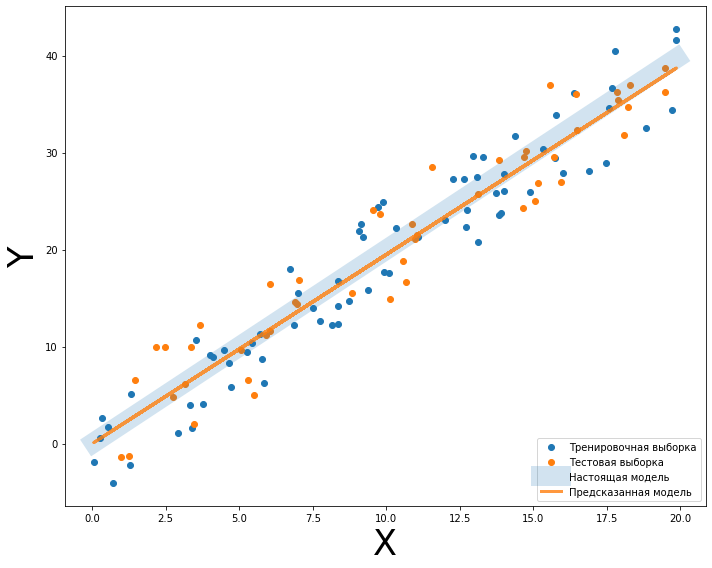

In [117]:
fig = plt.figure() # Инициализируем полотно
fig.set_size_inches(10, 8)  # Установка размеров графика

plt.scatter(X_train, y_train)  # Рассеянная диаграмма для тренировочной выборки
plt.scatter(X_test, y_test)  # Рассеянная диаграмма для тестовой выборки

plt.plot(X, [2*x for x in X], alpha=0.2, linewidth=20)  # График настоящей модели
plt.plot(X_train[index_argsort], model.predict(X_train[index_argsort]), alpha=0.8, linewidth=3)  # График предсказанной модели

plt.xlabel('X', fontsize=35)  # Название оси X
plt.ylabel('Y', fontsize=35)  # Название оси Y
plt.tight_layout()  # Автоматическое выравнивание
plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'Настоящая модель', 'Предсказанная модель'], loc='lower right')  # Легенда
plt.show()  # Показать график


In [118]:
model.coef_

array([[1.94918475]])

In [119]:
X_pol_train = X_train.copy()

for k in range(2,26):
    X_pol_train = np.append(X_pol_train, np.array([x**k for x in X_pol[:,0]]).reshape(72,-1), axis=1)
X_pol_train

array([[1.03441738e+01, 2.69735236e+02, 4.43002853e+03, ...,
        9.03198784e+27, 1.48337920e+29, 2.43624537e+30],
       [1.27076287e+01, 4.11474113e+01, 2.63945205e+02, ...,
        3.67230674e+18, 2.35564699e+19, 1.51105916e+20],
       [5.27819141e+00, 2.72021317e-01, 1.41874521e-01, ...,
        3.14726846e-07, 1.64147873e-07, 8.56124111e-08],
       ...,
       [6.98504387e-01, 2.40201277e+02, 3.72274224e+03, ...,
        2.38021440e+27, 3.68895819e+28, 5.71730536e+29],
       [5.84566253e+00, 3.22154528e+02, 5.78224326e+03, ...,
        6.96207586e+28, 1.24959958e+30, 2.24286426e+31],
       [1.37324729e+01, 3.03816343e+01, 1.67462164e+02, ...,
        1.12209085e+17, 6.18491288e+17, 3.40909538e+18]])

In [120]:
X_pol_test = X_test.copy()

for k in range(2,26):
    X_pol_test = np.append(X_pol_test, np.array([x**k for x in X_pol_test[:,0]]).reshape(48,-1), axis=1)
X_pol_test

array([[1.38378964e+01, 1.91487377e+02, 2.64978248e+03, ...,
        1.75635267e+26, 2.43042262e+27, 3.36319365e+28],
       [1.94821216e+01, 3.79553064e+02, 7.39449896e+03, ...,
        4.58810944e+29, 8.93861062e+30, 1.74143099e+32],
       [5.51010657e+00, 3.03612745e+01, 1.67293858e+02, ...,
        1.11347372e+17, 6.13535889e+17, 3.38064813e+18],
       ...,
       [9.68091205e-01, 9.37200581e-01, 9.07295639e-01, ...,
        4.74323140e-01, 4.59188060e-01, 4.44535923e-01],
       [1.01282555e+01, 1.02581560e+02, 1.03897225e+03, ...,
        1.34059297e+23, 1.35778681e+24, 1.37520118e+25],
       [1.05861926e+01, 1.12067475e+02, 1.18636788e+03, ...,
        3.70693728e+23, 3.92423522e+24, 4.15427100e+25]])

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
scaler = StandardScaler()
model = Ridge()

In [122]:
X_pol_test_scaled = scaler.fit_transform(X_pol_test)
X_pol_train_scaled = scaler.fit_transform(X_pol_train)

In [123]:
model.fit(X_pol_train_scaled, y_train)

Ridge()

array([[<AxesSubplot: title={'center': '0'}>]], dtype=object)

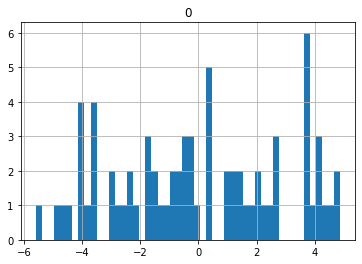

In [124]:
pd.DataFrame(y_train - model.predict(X_pol_train_scaled)).hist(bins=50)

In [125]:
X_pol_train_scaled

array([[ 0.0997249 ,  1.14278614,  1.09492151, ..., -0.18505022,
        -0.19188021, -0.19701089],
       [ 0.53224171, -0.78277254, -0.79427439, ..., -0.26647477,
        -0.2598395 , -0.25369005],
       [-0.82735968, -1.12709517, -0.91390142, ..., -0.26647477,
        -0.2598395 , -0.25369005],
       ...,
       [-1.66545127,  0.89400049,  0.77418804, ..., -0.24501683,
        -0.24293897, -0.24038876],
       [-0.72351137,  1.58435132,  1.708111  , ...,  0.36116542,
         0.31265002,  0.26811146],
       [ 0.71979019, -0.87346037, -0.8380266 , ..., -0.26647477,
        -0.2598395 , -0.25369005]])

In [126]:
train_errors = np.mean((y_train - model.predict(X_pol_train_scaled))**2)
test_errors = np.mean((y_test - model.predict(X_pol_test_scaled))**2)
print(f'Ошибка на трейне: {train_errors}. \nОшибка на тесте:  {test_errors}')

Ошибка на трейне: 8.115149963545056. 
Ошибка на тесте:  14.52670684006656


In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_pol)
model_pol = LinearRegression()
model_pol.fit(X_train_scaled, y_train)

LinearRegression()

In [128]:
X_test_scaled = scaler.fit_transform(X_pol_test)

In [129]:
model_pol.score(X_train_scaled, y_train)


0.3006366266878677

In [130]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train_scaled, y_train)
predictions_model_ridge = model_ridge.predict(X_test_scaled)
error_train = np.mean((y_train - model_ridge.predict(X_train_scaled))**2)
error_test = np.mean((y_test - model_ridge.predict(X_test_scaled))**2)
print(f'Ошибка на трейне: {error_train}', f'Ошибка на тесте: {error_test}')

ValueError: X has 25 features, but Ridge is expecting 121 features as input.

In [ ]:
train_error = np.mean((model_pol.predict(X_train_scaled) - y_train)**2)
test_error = np.mean((model_pol.predict(X_test_scaled) - y_test)**2)
print(f'Ошибка на трейне: {train_error}', f'Ошибка на тесте: {test_error}')

Ошибка на трейне: 8.087740263990717 Ошибка на тесте: 23.598466805261996


In [ ]:
X_train[:,0].reshape(90,)

ValueError: cannot reshape array of size 72 into shape (90,)

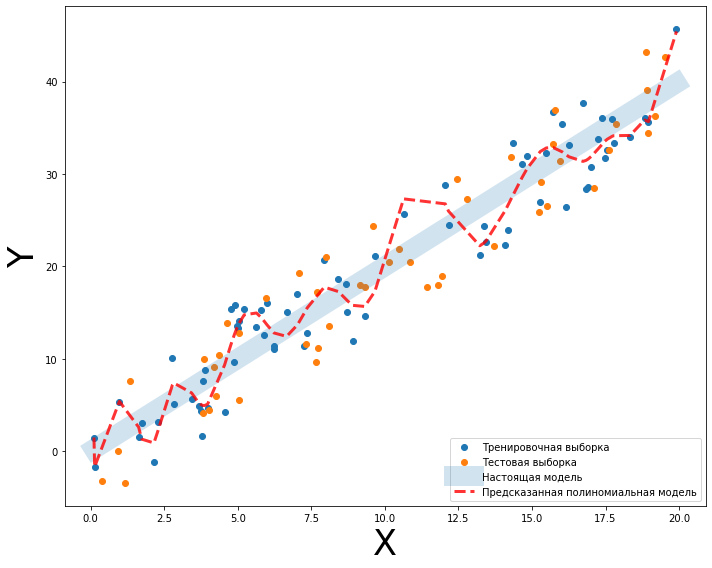

In [ ]:
fig = plt.figure() # Инициализируем полотно
fig.set_size_inches(10, 8)  # Установка размеров графика

plt.scatter(X_train, y_train)  # Рассеянная диаграмма для тренировочной выборки
plt.scatter(X_test, y_test)  # Рассеянная диаграмма для тестовой выборки

plt.plot(X, [2*x for x in X], alpha=0.2, linewidth=20)  # График настоящей модели
plt.plot(X_train[index_argsort], model_pol.predict(X_train_scaled[index_argsort]), '--r', alpha=0.8, linewidth=3)  # График предсказанной модели

plt.xlabel('X', fontsize=35)  # Название оси X
plt.ylabel('Y', fontsize=35)  # Название оси Y
plt.tight_layout()  # Автоматическое выравнивание
plt.legend(['Тренировочная выборка', 'Тестовая выборка', 'Настоящая модель', 'Предсказанная полиномиальная модель'], loc='lower right')  # Легенда
plt.show()  # Показать график


In [ ]:
np.mean((model.predict(X_train) - y_train)**2)

11.954226436947744

In [ ]:
np.mean((model.predict(X_test) - y_test)**2)

13.585077553003769

In [ ]:
np.mean((model_pol.predict(X_train_scaled) - y_train)**2)

6.308865149958287

In [ ]:
#from sklearn.preprocessing import StandardScaler
X_pol_test = X_test.copy()

for k in range(2,26):
    X_pol_test = np.append(X_pol_test, np.array([x**k for x in X_pol_test[:,0]]).reshape(48,-1), axis=1)
    
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_pol_test)
#model_pol = LinearRegression()
#model_pol.predict(X_test_scaled)
np.mean((model_pol.predict(X_test_scaled) - y_test)**2)

88.11050432231042

СЛЕДУЮЩЕЕ ЗАДАНИЕ

In [ ]:
import pandas as pd
from datetime import datetime

In [ ]:
y = pd.read_csv(r"C:\Users\User\Downloads\247324\5 y.csv")
y

,таргет2
0,625.00
1,22.00
2,35.00
3,145.00
4,387.00
...,...
331670,269.84
331671,544.77
331672,202.00
331673,265.00


In [ ]:
data = pd.read_csv(r"C:\Users\User\Downloads\247324\5 x.csv")
data

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
0,6035.989239,1000.00,39,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3591.033473,80000.00,87,2009,34.41,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3661.424550,20.00,8,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4321.245721,99.00,79,2009,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6035.989239,1900.00,28,2009,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331670,7635.064778,35.98,2,2017,34.41,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
331671,38415.722876,271.03,4,2017,34.41,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
331672,6098.303122,200.00,3,2017,34.41,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
331673,38415.722876,250.00,1,2017,34.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
x = pd.read_csv(r"C:\Users\User\Downloads\247324\5 x.csv")
y = pd.read_csv(r"C:\Users\User\Downloads\247324\5 y.csv")

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=33)
kf.split(x)

<generator object _BaseKFold.split at 0x000001AC88CBC510>

In [134]:
train_index_temp = []
test_index_temp = []
i = 0
for train_index, test_index in kf.split(x):
    #train_index_temp.append(train_index)
    #test_index_temp.append(test_index)
    print(f'{i}-строка train_index : {train_index}, test_index : {test_index}')
    i += 1

#print(f'train_index_temp :{pd.DataFrame(train_index_temp).shape}, test_index_temp : {pd.DataFrame(test_index_temp).shape}')

0-строка train_index : [     1      2      3 ... 331672 331673 331674], test_index : [     0      4      5 ... 331654 331661 331664]
1-строка train_index : [     0      1      2 ... 331671 331672 331674], test_index : [    65     70     90 ... 331653 331659 331673]
2-строка train_index : [     0      1      2 ... 331672 331673 331674], test_index : [     6      9     11 ... 331641 331665 331667]
3-строка train_index : [     0      1      2 ... 331671 331672 331673], test_index : [     8     18     30 ... 331663 331670 331674]
4-строка train_index : [     0      1      2 ... 331672 331673 331674], test_index : [     3     13     15 ... 331651 331668 331671]
5-строка train_index : [     0      1      2 ... 331672 331673 331674], test_index : [    14     16     20 ... 331623 331630 331652]
6-строка train_index : [     0      1      2 ... 331672 331673 331674], test_index : [    36     39     44 ... 331650 331662 331666]
7-строка train_index : [     0      2      3 ... 331671 331673 331674

In [159]:
for i in x.columns:
    x[i] = x[i].apply(int)

In [160]:
x

,Категория,Цель в долларах,Срок,Год публикации,Close_brent,CAD,CHF,DKK,EUR,GBP,...,Design,Fashion,Film & Video,Food,Journalism,Music,Photography,Publishing,Technology,Theater
0,6035,1000,39,2009,34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3591,80000,87,2009,34,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3661,20,8,2009,34,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4321,99,79,2009,34,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6035,1900,28,2009,34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331670,7635,35,2,2017,34,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
331671,38415,271,4,2017,34,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
331672,6098,200,3,2017,34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
331673,38415,250,1,2017,34,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
losses_train = []
losses_test = []
for train_index, test_index in kf.split(x):
    X_train, X_test = x.values[train_index], x.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

    scaller = StandardScaler()
    scaller_y = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    #y_train_scaled = scaller_y.fit_transform(y_train)
    model = Lasso()
    model.fit(X_train_scaled, y_train)
    
    losses_test.append(np.mean((model.predict(X_test_scaled)- y_test)**2)**(1/2))
    losses_train.append(np.mean(np.abs(pd.DataFrame(model.predict(X_train_scaled)) - pd.DataFrame(y_train))))
print(f'losses_train : {losses_train}, losses_test : {losses_test}')

    

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3502: 

losses_train : [0    14386.055049
dtype: float64, 0    14373.592981
dtype: float64, 0    14349.496245
dtype: float64, 0    14542.274016
dtype: float64, 0    14368.978909
dtype: float64, 0    14191.484058
dtype: float64, 0    14441.422859
dtype: float64, 0    14072.842433
dtype: float64, 0    14422.048856
dtype: float64, 0    14114.390363
dtype: float64], losses_test : [62192.96520410938, 81580.23146239306, 77803.33368690417, 56873.22304135609, 75771.45867940944, 122496.94760002472, 72788.46640632601, 135838.5232397492, 70422.9029352002, 156137.28488839095]


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
initial_data = pd.read_csv(r"C:\Users\User\Downloads\247324\5 initial_data.csv", index_col='id')

#initial_cols = ['vendor_id', 'passenger_count', 'pickup_longitude',
#                'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
#                'trip_duration']

#initial_data = initial_data[initial_cols]
initial_data

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0
...,...,...,...,...,...,...,...,...,...
id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778.0
id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655.0
id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764.0


In [ ]:
import datetime as dt
initial_data.pickup_datetime = initial_data.pickup_datetime.astype('datetime64[s]').dt.date
initial_data

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,
id2875421,2,2016-03-14,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0
id2377394,1,2016-06-12,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0
id3858529,2,2016-01-19,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0
id3504673,2,2016-04-06,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0
id2181028,2,2016-03-26,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0
...,...,...,...,...,...,...,...,...,...
id2376096,2,2016-04-08,4,-73.982201,40.745522,-73.994911,40.740170,N,778.0
id1049543,1,2016-01-10,1,-74.000946,40.747379,-73.970184,40.796547,N,655.0
id2304944,2,2016-04-22,1,-73.959129,40.768799,-74.004433,40.707371,N,764.0


array([[<AxesSubplot: title={'center': 'passenger_count'}>]], dtype=object)

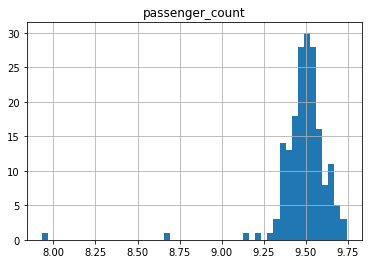

In [ ]:
np.log1p(initial_data.groupby('pickup_datetime').agg({'passenger_count':'sum'})).hist(bins=50)

In [ ]:
initial_data = initial_data.assign(log_trip_duration = np.log1p(initial_data.trip_duration))
initial_data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration
id,,,,,,,,
id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,455.0,6.122493
id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,663.0,6.498282
id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,2124.0,7.661527
id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,429.0,6.063785
id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,435.0,6.077642
...,...,...,...,...,...,...,...,...
id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,778.0,6.658011
id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,655.0,6.486161
id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,764.0,6.639876


In [ ]:
initial_data.drop('trip_duration',axis=1, inplace=True)
initial_data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,log_trip_duration
id,,,,,,,
id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,6.122493
id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,6.498282
id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,7.661527
id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,6.063785
id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,6.077642
...,...,...,...,...,...,...,...
id2376096,2,4,-73.982201,40.745522,-73.994911,40.740170,6.658011
id1049543,1,1,-74.000946,40.747379,-73.970184,40.796547,6.486161
id2304944,2,1,-73.959129,40.768799,-74.004433,40.707371,6.639876


In [ ]:
processed_data = pd.read_csv(r"C:\Users\User\Downloads\247324\5 processed_data.csv")
processed_data

,id,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km
0,id2875421,1,930.399753,0,455.0,1.500479
1,id2377394,0,930.399753,0,663.0,1.807119
2,id3858529,1,930.399753,0,2124.0,6.392080
3,id3504673,1,930.399753,0,429.0,1.487155
4,id2181028,1,930.399753,0,435.0,1.189925
...,...,...,...,...,...,...
1458639,id2376096,1,1053.529749,0,778.0,1.226296
1458640,id1049543,0,930.399753,0,655.0,6.056935
1458641,id2304944,1,930.399753,0,764.0,7.832952
1458642,id2714485,0,930.399753,0,373.0,1.093786


In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_validate
X = initial_data.drop('log_trip_duration', axis=1)
y = initial_data.log_trip_duration
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
cv = KFold(n_splits=10, shuffle=True, random_state=33)
cv_result = cross_validate(model, X=X_train, y=y_train, cv=cv, 
                           n_jobs=-1, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)




In [ ]:
np.mean(-cv_result['test_score'])

0.6249353544661127

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
np.mean((y_test - model.predict(X_test))**2)

0.6159333177575478

In [ ]:
X = data.drop('trip_duration', axis=1)
y = data['trip_duration']

In [ ]:

X.pickup_datetime = X.pickup_datetime.astype('datetime64[s]').dt.month


In [ ]:
X = X.drop('id', axis=1)
X

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,2,3,1,-73.982155,40.767937,-73.964630,40.765602,N
1,1,6,1,-73.980415,40.738564,-73.999481,40.731152,N
2,2,1,1,-73.979027,40.763939,-74.005333,40.710087,N
3,2,4,1,-74.010040,40.719971,-74.012268,40.706718,N
4,2,3,1,-73.973053,40.793209,-73.972923,40.782520,N
...,...,...,...,...,...,...,...,...
1458639,2,4,4,-73.982201,40.745522,-73.994911,40.740170,N
1458640,1,1,1,-74.000946,40.747379,-73.970184,40.796547,N
1458641,2,4,1,-73.959129,40.768799,-74.004433,40.707371,N
1458642,1,1,1,-73.982079,40.749062,-73.974632,40.757107,N


In [ ]:
X = pd.concat([X, pd.get_dummies(X.store_and_fwd_flag,prefix='store_and_fwd_flag')], axis=1).drop(['store_and_fwd_flag', 'store_and_fwd_flag_Y'], axis=1)
X

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag_N
0,2,3,1,-73.982155,40.767937,-73.964630,40.765602,1
1,1,6,1,-73.980415,40.738564,-73.999481,40.731152,1
2,2,1,1,-73.979027,40.763939,-74.005333,40.710087,1
3,2,4,1,-74.010040,40.719971,-74.012268,40.706718,1
4,2,3,1,-73.973053,40.793209,-73.972923,40.782520,1
...,...,...,...,...,...,...,...,...
1458639,2,4,4,-73.982201,40.745522,-73.994911,40.740170,1
1458640,1,1,1,-74.000946,40.747379,-73.970184,40.796547,1
1458641,2,4,1,-73.959129,40.768799,-74.004433,40.707371,1
1458642,1,1,1,-73.982079,40.749062,-73.974632,40.757107,1


In [ ]:
kf = KFold(n_splits=20, shuffle=True, random_state=33)
kf

KFold(n_splits=20, random_state=33, shuffle=True)

In [ ]:
kf.split(X)

<generator object _BaseKFold.split at 0x0000015780322120>

In [ ]:
losses_test = list()
losses_train = list()
for train_index, test_index in kf.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    losses_test.append(np.mean(((y_test - model.predict(X_test))**2)**(1/2)))
    losses_train.append(np.mean(((y_train - model.predict(X_train))**2)**(1/2)))

In [ ]:
np.mean(losses_test)

607.8918437020676

In [ ]:
np.mean(losses_train)

607.8156994417199

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression



In [ ]:
processed_data = pd.read_csv(r"C:\Users\User\Downloads\247324\5 processed_data.csv")
processed_data

,id,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km
0,id2875421,1,930.399753,0,455.0,1.500479
1,id2377394,0,930.399753,0,663.0,1.807119
2,id3858529,1,930.399753,0,2124.0,6.392080
3,id3504673,1,930.399753,0,429.0,1.487155
4,id2181028,1,930.399753,0,435.0,1.189925
...,...,...,...,...,...,...
1458639,id2376096,1,1053.529749,0,778.0,1.226296
1458640,id1049543,0,930.399753,0,655.0,6.056935
1458641,id2304944,1,930.399753,0,764.0,7.832952
1458642,id2714485,0,930.399753,0,373.0,1.093786


In [ ]:
#processed_data['trip_duration_logged'] = np.log1p(processed_data.trip_duration)
X = processed_data.drop(['trip_duration'], axis=1)
X.set_index('id', inplace=True)
y = processed_data.trip_duration
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
kf = KFold(n_splits=20, shuffle=True, random_state=33)
cv_result = cross_validate(model, X_train, y_train, cv=kf, n_jobs=-1, scoring=, return_train_score=True)
cv_result

{'fit_time': array([0.27096796, 0.24300075, 0.25900102, 0.2409873 , 0.2470336 ,
        0.25000024, 0.24899983, 0.26500535, 0.24699855, 0.24496603,
        0.23800111, 0.24700165, 0.24400544, 0.2710309 , 0.26399398,
        0.25899649, 0.23896432, 0.24796629, 0.24099779, 0.20400143]),
 'score_time': array([0.00402927, 0.00401831, 0.00297832, 0.00299573, 0.00396991,
        0.00400114, 0.00300026, 0.00298977, 0.00399971, 0.00300097,
        0.00399947, 0.00503159, 0.00396395, 0.00300217, 0.0040319 ,
        0.00197196, 0.00299907, 0.00399804, 0.00396919, 0.00296926]),
 'test_score': array([-0.39005766, -0.40181029, -0.50793847, -0.39525545, -0.60988242,
        -0.40796676, -0.44755127, -0.40896493, -0.39873004, -0.39454998,
        -0.3980174 , -0.40465475, -0.39423988, -0.40679294, -0.44356295,
        -0.70191599, -0.41825838, -0.38913766, -0.40273221, -0.39059465]),
 'train_score': array([-0.43491669, -0.43429813, -0.42875973, -0.43464435, -0.42372444,
        -0.43396235, -0.431876

In [ ]:
cv_result['train_score'].mean()

-0.4325812679415022

In [ ]:
kf = KFold(n_splits=20, shuffle=True, random_state=33)
cv_result = cross_validate(model, X_train, y_train, cv=kf, n_jobs=-1, scoring='neg_mean_squared_error', return_train_score=True)
cv_result['train_score'].mean()


-20963440.970229525

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


СЛЕДУЮЩЕЕ ЗАДАНИЕ. КОЛЛИНЕАРНОСТЬ ПРИЗНАКОВ. РЕГУЛИЗАЦИЯ

In [1]:
#Загружаем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [2]:
processed_data = pd.read_csv(r"C:\Users\User\Downloads\247324\5 processed_data.csv").set_index('id')
#new_data = pd.read_csv(r)

In [15]:
np.linalg.matrix_rank(processed_data.values)

5

In [4]:
X = processed_data.drop(columns='distance_km')
y = processed_data.distance_km

In [37]:
model = Ridge(alpha=10)
kf = KFold(n_splits=10, shuffle=True, random_state=33)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
cv_result = cross_validate(model, X=X_train, scoring='neg_mean_squared_log_error', y=y_train, cv=kf, return_train_score=True)
#error_test = model.predict(X_test) - y_test
cv_result


{'fit_time': array([0.22430491, 0.23045421, 0.23508239, 0.23272753, 0.25233459,
        0.22480178, 0.23323035, 0.21692157, 0.21814919, 0.23469448]),
 'score_time': array([0.03113866, 0.03013301, 0.03036022, 0.0299623 , 0.03563476,
        0.03047323, 0.03077364, 0.02900982, 0.02900386, 0.02964258]),
 'test_score': array([-0.43522993, -0.44149241, -0.43649342, -0.4405122 , -0.43979934,
        -0.44125624, -0.44058906, -0.43885717, -0.43973378, -0.43895395]),
 'train_score': array([-0.43598623, -0.43882818, -0.43930848, -0.4400499 , -0.43856278,
        -0.43971099, -0.44005785, -0.44018458, -0.44018292, -0.44006631])}

In [43]:
for i in range(1,200, 50):
    model = Ridge(alpha=i)
    kf = KFold(n_splits=10, shuffle=True, random_state=33)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)
    cv_result = cross_validate(model, X=X_train_scaled, scoring='neg_mean_squared_log_error', y=y_train, cv=kf, return_train_score=True, n_jobs=-1)
    #error_test = model.predict(X_test) - y_test
    

{'fit_time': array([0.16221905, 0.15677524, 0.16434526, 0.16176391, 0.1617136 ,
       0.15776491, 0.17718315, 0.16191959, 0.14349079, 0.14714527]), 'score_time': array([0.02717543, 0.0280745 , 0.02959371, 0.02832508, 0.02709007,
       0.02926254, 0.02796555, 0.02883697, 0.02565885, 0.02526355]), 'test_score': array([-0.43523021, -0.44149248, -0.43649385, -0.44051222, -0.43979947,
       -0.44125621, -0.44058902, -0.43885745, -0.43973359, -0.43895415]), 'train_score': array([-0.43598636, -0.43882829, -0.43930859, -0.44005001, -0.43856288,
       -0.4397111 , -0.44005796, -0.4401847 , -0.44018302, -0.44006642])}
{'fit_time': array([0.16682673, 0.17271948, 0.17908359, 0.17015266, 0.16792345,
       0.17200947, 0.15717173, 0.16808248, 0.16841936, 0.1441462 ]), 'score_time': array([0.03025293, 0.03400207, 0.03495049, 0.02911472, 0.03209662,
       0.02799821, 0.02814865, 0.02896571, 0.02808189, 0.02403927]), 'test_score': array([-0.43523102, -0.44149293, -0.43649427, -0.44051257, -0.43979

In [5]:
new_df = pd.read_csv(r"C:\Users\User\Downloads\new_data.csv")

In [12]:
np.logspace(-6, 6, 13)

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = new_df.set_index('id').drop('log_trip_duration', axis=1)
y = new_df.log_trip_duration
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=33)

params = {'alpha': np.logspace(0,10,10)}
model = Ridge()
grid = GridSearchCV(model, cv=5, param_grid=params,  
                    greater_is_better=False, 
                    scoring='neg_mean_squared_log_error', 
                    return_train_score=True, 
                    n_jobs=-1)
grid.fit(X_train, y_train)



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
 -0.00807819         nan         nan         nan]
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the train scores are non-finite: [        nan         nan         nan         nan         nan         nan
 -0.00807524         nan         nan         nan]
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=6.4701e-29): result may not be

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10])},
             return_train_score=True, scoring='neg_mean_squared_log_error')

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = new_df.set_index('id').drop('log_trip_duration', axis=1)
y = new_df.log_trip_duration
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2, 
                                                    random_state=33)

params = {'alpha': np.logspace(0,10,10)}
model = Ridge()
grid = GridSearchCV(model, cv=5, param_grid=params,  
                    scoring='neg_mean_squared_log_error', 
                    return_train_score=True, 
                    n_jobs=-1)
grid.fit(X_train, y_train)
print(f'best_score_ : {grid.best_score_}, grid.best_params_ : {grid.best_params_}')

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan -0.00865296
 -0.01098069 -0.0126156  -0.01281934 -0.01283588]
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the train scores are non-finite: [        nan         nan         nan         nan         nan -0.00864941
 -0.01098014 -0.01261557 -0.01281933 -0.01283587]
  warnings.warn(


best_score_ : -0.00865295570605269, grid.best_params_ : {'alpha': 359381.36638046254}


In [14]:
print(f'best_score_ : {grid.best_score_}, grid.best_params_ : {grid.best_params_}')

best_score_ : -0.008078191377337682, grid.best_params_ : {'alpha': 4641588.833612782}


РАБОТА С ВЫБРОСАМИ ЧЕРЕЗ BOXPLOT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

temp_df = pd.read_csv(r"C:\Users\User\Downloads\247324\1\ks.csv")
temp_df

,Название,Категория,Главная категория,Валюта,Дедлайн,Дата публикации,Состояние,Инвесторов,Страна,Собрано в долларах,Цель в долларах
0,"Don't Call it a Comeback ""Telescopes""",Music,Music,USD,2013-01-10,2012-12-09 06:03:52,successful,23,US,600.00,600.00
1,Arcade County (Canceled),Games,Games,USD,2012-04-29,2012-03-30 23:40:45,canceled,5,US,71.00,9000.00
2,Hayashi Skate Co. Solar Skateboard backpack,Accessories,Fashion,CAD,2017-07-22,2017-05-23 23:00:13,canceled,8,CA,360.36,2391.77
3,Me & You Coordinating Sunglasses- Optical Qual...,Accessories,Fashion,USD,2016-11-18,2016-10-19 22:06:41,failed,20,US,502.00,10000.00
4,New Carts for Istanbul Street Food Vendors,Food,Food,USD,2015-05-17,2015-04-17 18:10:47,successful,62,US,2414.00,1400.00
...,...,...,...,...,...,...,...,...,...,...,...
378656,Kitten Mittens - is your cat making too much N...,Knitting,Crafts,NZD,2016-11-23,2016-10-24 21:08:37,suspended,0,NZ,0.00,48.59
378657,TurnAround//The End Needs A Beginning Album Re...,Rock,Music,GBP,2013-05-15,2013-04-15 19:09:37,failed,0,GB,0.00,2501.45
378658,Celtic inspired band looking to move forward w...,Rock,Music,USD,2011-04-29,2011-03-29 03:11:40,failed,0,US,0.00,1500.00
378659,Listening & Speaking in Virtual Reality: 5 Int...,Software,Technology,USD,2014-05-09,2014-04-30 02:45:45,failed,1,US,200.00,67000.00


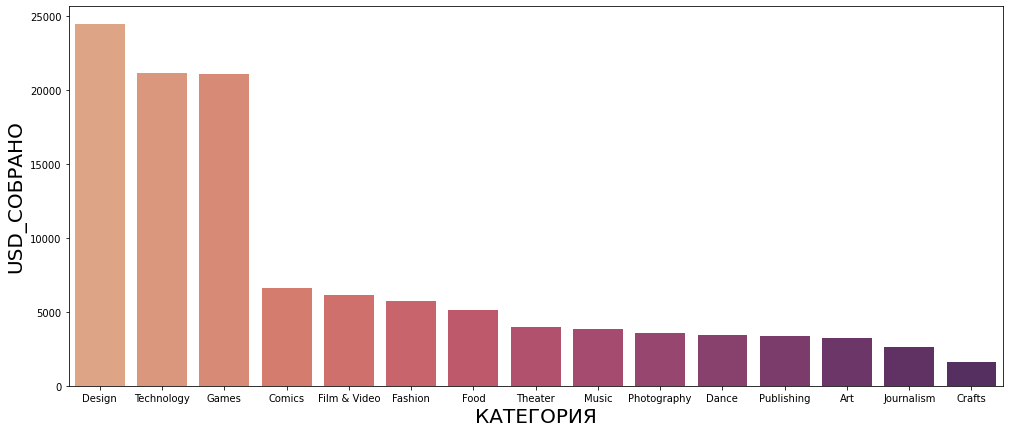

In [29]:
data=temp_df.groupby('Главная категория', as_index=False)['Собрано в долларах'].mean()
fig = plt.figure()
fig.set_size_inches(18,6)
sns.barplot(data.sort_values('Собрано в долларах', ascending=False), x='Главная категория', y='Собрано в долларах',palette='flare' )
#sns.color_palette("flare")
plt.tight_layout()
plt.xlabel('КАТЕГОРИЯ', size=20)  # Specify the label size
plt.ylabel('USD_СОБРАНО', size=20)
plt.show()

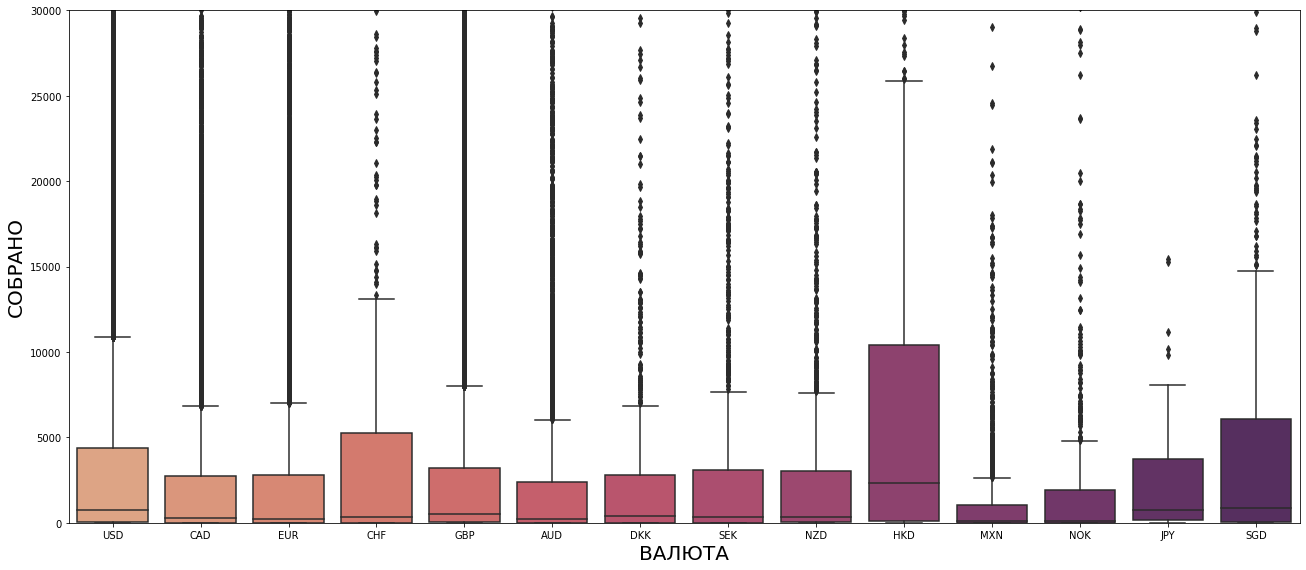

In [44]:
fig = plt.figure()
fig.set_size_inches(18,8)
sns.boxplot(temp_df, x="Валюта", y='Собрано в долларах', palette='flare' )
plt.tight_layout()
plt.xlabel('ВАЛЮТА', size=20)  # Specify the label size
plt.ylabel('СОБРАНО', size=20)
plt.ylim((0,30000))
plt.show()

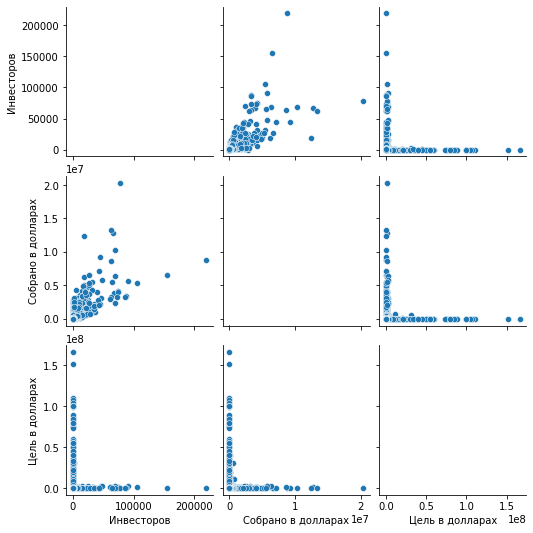

In [46]:
sns.pairplot(temp_df)

In [61]:
from sklearn.linear_model import LassoCV
X = pd.read_csv(r"C:\Users\User\Downloads\247324\5 x.csv")
y = pd.read_csv(r"C:\Users\User\Downloads\247324\5 y.csv")
model = Lasso(alpha=10)
model.fit(X, y)
model.coef_

array([ 5.99392746e-02, -1.00476218e-04, -2.43510559e+01,  1.21383042e+03,
       -0.00000000e+00,  1.73511879e+03, -0.00000000e+00, -0.00000000e+00,
        2.97727341e+01,  1.20034676e+03, -0.00000000e+00,  0.00000000e+00,
        1.01197793e+03, -0.00000000e+00, -0.00000000e+00,  7.21648168e+02,
       -0.00000000e+00,  8.66048441e+02, -2.96791863e+02,  1.76331663e+03,
       -0.00000000e+00, -5.98288472e+02,  0.00000000e+00, -8.87009396e+01,
       -0.00000000e+00,  3.05505009e+02, -0.00000000e+00,  8.97101338e+02,
        0.00000000e+00,  2.24708205e+02, -1.36895453e+00,  1.10300826e+03])

In [77]:
scores = []
for i in range(1, 100, 10):
    model = Lasso(alpha=i)
    model.fit(X, y)
    scores.append(model.score(X,y))

scores


[0.0007645200153436615,
 0.0007388832477730478,
 0.0007241463160932993,
 0.0007105495110564242,
 0.0007003759549031319,
 0.0006948589499337077,
 0.0006906118950121831,
 0.0006892754184613104,
 0.0006877364454759283,
 0.0006859949760562589]